# Machine Learning Task 1 and Task 2 From Arc-Technology internship

## Task 1: Email Spam Classification:
* Build a machine learning model to classify emails as spam or not spam using a
labeled dataset. Your job is to preprocess the email text data, extract important
features, and train a model to accurately identify spam emails. Finally, evaluate
your model’s performance.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [19]:
spam_data=pd.read_csv(r"C:\Users\H S COMPUTER S HYD\Desktop\python Files\spam.csv",encoding="latin-1") #load dataset

In [20]:
spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


* “Due to privacy constraints in accessing real email datasets, the SMS Spam Collection Dataset was used as a substitute. The dataset contains textual messages labeled as spam or non-spam, which closely resemble email spam content. The same machine learning techniques used for email spam detection apply to this dataset.”
* this dataset from:https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [21]:
spam_data=spam_data[["v1","v2"]]   #we need just email/message or spam or not
spam_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [41]:
spam_data.columns=["label","email_text"]      #nothing just convert name like v1 into label and v2 into email_text
spam_data.head()                              

,label,email_text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
spam_data["label"]=spam_data["label"].map({"spam":1,"ham":0})  #map into 0 or 1
spam_data.head()

,label,email_text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')            #Convert text into number

In [25]:
x = vectorizer.fit_transform(spam_data['email_text'])  #x=emails
y = spam_data['label']                                 #y=spam or not

In [26]:
from sklearn.model_selection import train_test_split  

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)  #divide data 80% for training and 20% for testing

In [28]:
lr=LogisticRegression(max_iter=1000)

In [29]:
lr.fit(x_train,y_train)   #Train

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [30]:
y_pred=lr.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [35]:
print("test accuracy:",accuracy_score(y_test,y_pred))
print("confusion_matrix:",confusion_matrix(y_test,y_pred))

test accuracy: 0.9443946188340807
confusion_matrix: [[962   3]
 [ 59  91]]


In [36]:
print("classification_report:",classification_report(y_test,y_pred))

classification_report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.97      0.61      0.75       150

    accuracy                           0.94      1115
   macro avg       0.96      0.80      0.86      1115
weighted avg       0.95      0.94      0.94      1115



# Checking in simple Examples

In [42]:
sample_email = ["Congratulations! You have won free money"]

sample_vector = vectorizer.transform(sample_email)
prediction = lr.predict(sample_vector)

if prediction[0] == 1:
    print("Spam Email")
else:
    print("Not Spam Email")

Spam Email


In [38]:
sample_email = ["Win a free prize now"]
sample_vector = vectorizer.transform(sample_email)

prediction = lr.predict(sample_vector)

if prediction[0] == 1:
    print("Spam Email")
else:
    print("Not Spam Email")

Spam Email


In [40]:
sample_email = ["Hi, are we meeting tomorrow for the project discussion?"]

sample_vector = vectorizer.transform(sample_email)
prediction = lr.predict(sample_vector)

if prediction[0] == 1:
    print("Spam Email")
else:
    print("Not Spam Email")

Not Spam Email


## Complete

In [60]:
#new

# Task 2: Mnist Digit Recognition

* Use the MNIST dataset of handwritten digit images to build a machine learning
model that can recognize and classify digits from 0 to 9. Your task is to preprocess
the images, train a model to correctly identify the digits, and evaluate its accuracy.

In [43]:
from sklearn.datasets import fetch_openml      #import data fom sklearn 
data = fetch_openml('mnist_784', version=1)      

In [45]:
x=data.data
y=data.target
y=y.astype(int) #label to string

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)  #divide data 80% for training and 20% for testing

In [47]:
lr2=LogisticRegression(max_iter=1000)

In [48]:
lr2.fit(x_train,y_train)

C:\Users\H S COMPUTER S HYD\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [49]:
y_pred=lr2.predict(x_test)

In [50]:
print("test accuracy:",accuracy_score(y_test,y_pred))

test accuracy: 0.916


In [51]:
print("classification_report:",classification_report(y_test,y_pred))

classification_report:               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.89      0.90      0.89      1433
           4       0.92      0.92      0.92      1295
           5       0.89      0.86      0.88      1273
           6       0.94      0.95      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.89      0.87      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000



# Test in simple

In [52]:
import matplotlib.pyplot as plt

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

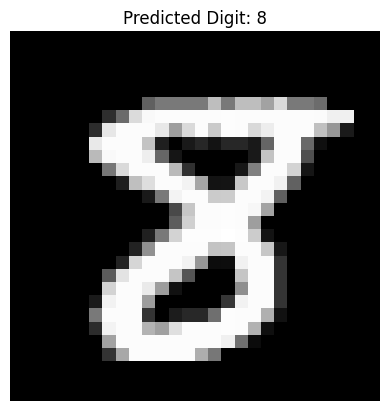

In [54]:
index = 0

plt.imshow(x_test.iloc[index].values.reshape(28, 28), cmap='gray')
plt.title("Predicted Digit: " + str(y_pred[index]))
plt.axis('off')

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

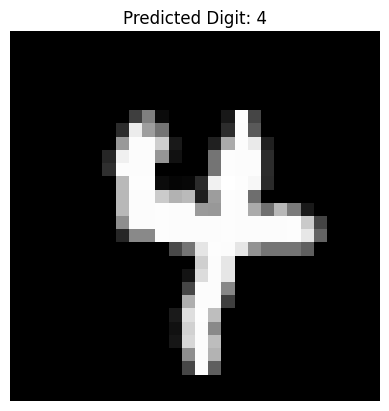

In [58]:
index = 1

plt.imshow(x_test.iloc[index].values.reshape(28, 28), cmap='gray')
plt.title("Predicted Digit: " + str(y_pred[index]))
plt.axis('off')

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

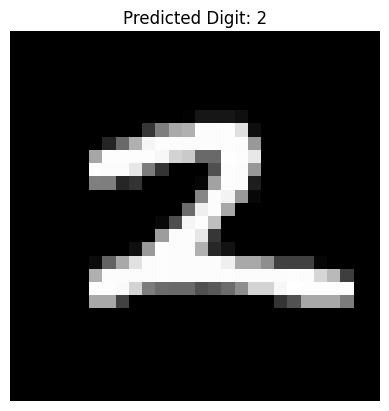

In [59]:
index = 7

plt.imshow(x_test.iloc[index].values.reshape(28, 28), cmap='gray')
plt.title("Predicted Digit: " + str(y_pred[index]))
plt.axis('off')

## Complete